In [1]:
import os
import warnings

from src.main import ClusterService

warnings.filterwarnings('ignore')
os.chdir('..')

# ClusterService

This class is used for clustering the images and evaluation results

In [ ]:
service = ClusterService(path_to_images='data/processed/test-task/clusters', path_to_target_clusters='data/processed/test-task/clusters.csv')

Target clusters contain different cluster_id with background images. But model for generating embeddings of faces ignore background images. That's why full evaluation according to 'clusters.csv' is poor. However, after face filtering images and clustering them, quality of algorithm dramatically improved 

In [3]:
service.run('data/processed/test-task/embeddings.txt')
# service.run() # will generate embeddings in real time


Background and face images clustering: 
Homogeneity score: 0.3965393867896544
Completeness score: 0.6129324424069272
V-Measure score: 0.4815426202610689

Face images clustering: 
Homogeneity score: 0.9768697821391191
Completeness score: 0.8898553170854854
V-Measure score: 0.9313345281506219


# Visualization of clusters

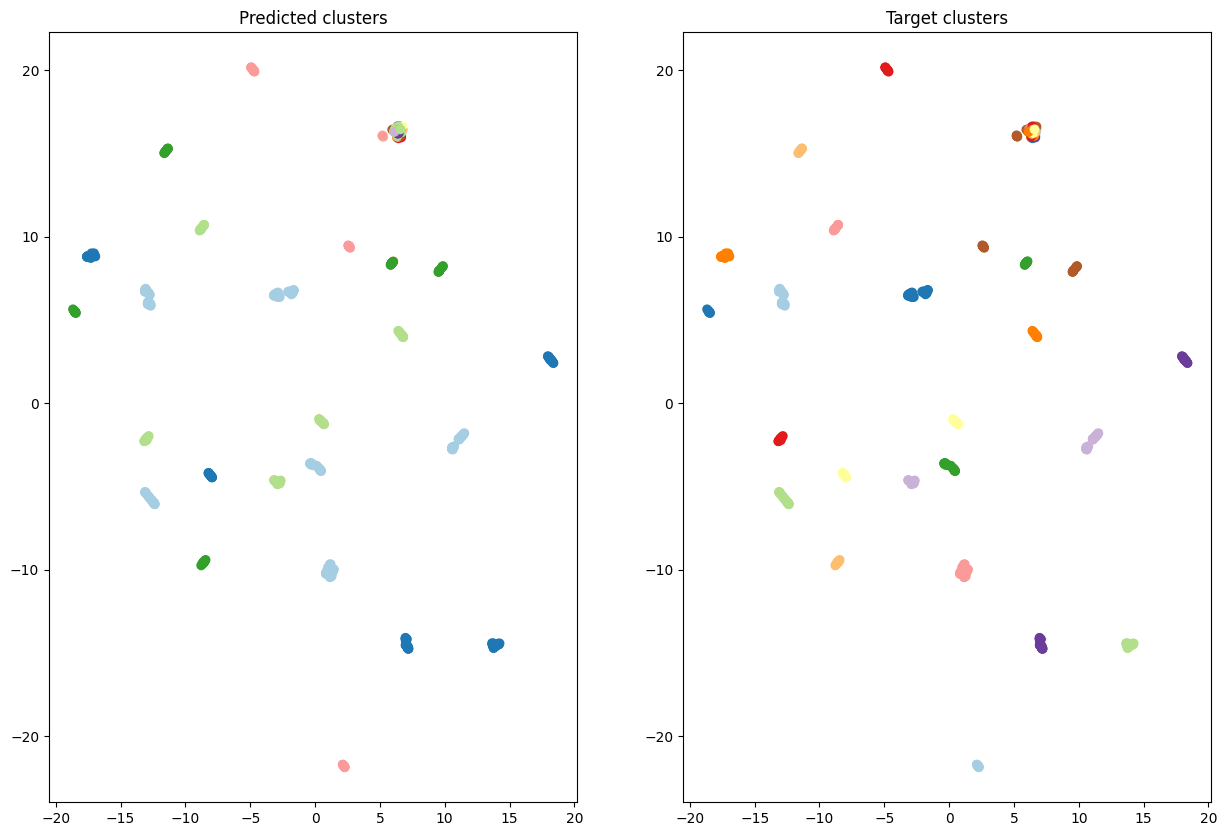

In [4]:
from src.utils.visualization import vis_clusters
from src.utils.embeddings_projection import resize_embedding

embeddings, labels, predictions = service.get_data_for_visualization('data/processed/test-task/embeddings.txt')
embeddings = resize_embedding(embeddings, dim=2)
 
vis_clusters(embeddings, predictions, labels)